# MSTA 6102 - Question 3: Hospital Readmission Analysis
# Jupyter Notebook for Diabetes Dataset Analysis

## Author: Anuary Mulombi 
## Date: October 2025
## Dataset: Diabetes 130-US Hospitals (1999-2008) from Kaggle

---

# Dataset Overview and Research Context

## Background

Hospital readmissions, particularly within 30 days of discharge, represent a significant challenge in healthcare systems worldwide. These readmissions are costly, often preventable, and can indicate gaps in care quality, discharge planning, or disease management. In the United States alone, hospital readmissions cost Medicare billions of dollars annually, prompting initiatives to identify and reduce preventable readmissions.

Patients with diabetes face particularly high readmission rates due to the chronic nature of the disease, frequent comorbidities, and the complexity of diabetes management. Understanding the factors that predict early readmission among diabetic patients can help healthcare providers identify high-risk individuals and implement targeted interventions to improve outcomes and reduce costs.

## Dataset Description

### Source and Collection
This analysis uses the **Diabetes 130-US Hospitals dataset**, obtained from the UCI Machine Learning Repository via Kaggle. The dataset represents **10 years of clinical care** at 130 hospitals across the United States, spanning from **1999 to 2008**.

**Dataset Link:** https://www.kaggle.com/datasets/brandao/diabetes

### Dataset Characteristics

**Size and Scope:**
- **~100,000 hospital encounters** (rows)
- **50+ variables** (columns)
- Represents approximately **70,000 unique patients**
- Covers **130 US hospitals** and integrated delivery networks

**Patient Population:**
- All patients are diagnosed with diabetes (Type 1, Type 2, or other forms)
- Includes inpatient encounters only (not outpatient or emergency-only visits)
- Patients admitted for at least 1 day and at most 14 days
- Laboratory tests were performed during the encounter
- Medications were administered during the encounter

### Key Variables

**Outcome Variable:**
- `readmitted`: Whether the patient was readmitted to the hospital
  - `<30`: Readmitted within 30 days
  - `>30`: Readmitted after 30 days
  - `NO`: Not readmitted

**Demographic Variables:**
- `age`: Patient age group (in 10-year brackets)
- `gender`: Male, Female, or Unknown/Invalid
- `race`: Caucasian, AfricanAmerican, Hispanic, Asian, Other

**Clinical Variables:**
- `time_in_hospital`: Number of days in hospital (1-14 days)
- `num_lab_procedures`: Number of laboratory tests performed
- `num_procedures`: Number of procedures (other than lab tests) performed
- `num_medications`: Number of distinct medications prescribed
- `number_diagnoses`: Number of diagnoses entered (up to 9)

**Prior Healthcare Utilization:**
- `number_outpatient`: Number of outpatient visits in the year before hospitalization
- `number_emergency`: Number of emergency visits in the year before hospitalization
- `number_inpatient`: Number of inpatient visits in the year before hospitalization

**Laboratory Results:**
- `A1Cresult`: Hemoglobin A1c test result
  - `>7`: Indicates elevated glucose levels (poor control)
  - `>8`: Indicates very elevated glucose levels (very poor control)
  - `Norm`: Normal range
  - `None`: Test not performed

**Medication Information:**
- `diabetesMed`: Was any diabetes medication prescribed? (Yes/No)
- `insulin`: Insulin dosage change
  - `Up`: Dosage increased
  - `Down`: Dosage decreased
  - `Steady`: No change
  - `No`: Not prescribed
- Multiple columns for specific diabetes medications (metformin, glipizide, etc.)

**Admission Details:**
- `admission_type_id`: Type of admission (Emergency, Urgent, Elective, etc.)
- `discharge_disposition_id`: Where patient was discharged to
- `admission_source_id`: Where patient was admitted from

## Research Questions

This analysis aims to answer the following questions:

1. **What patient characteristics predict 30-day hospital readmission among diabetic patients?**
   - Which demographic factors are associated with readmission?
   - How do clinical characteristics influence readmission risk?
   - What role does prior healthcare utilization play?

2. **Can we develop a predictive model to identify high-risk patients?**
   - What is the model's discrimination ability (AUC)?
   - Which variables are the strongest predictors?
   - How well does the model classify patients into risk groups?

3. **What are the clinical implications for reducing readmissions?**
   - Which risk factors are modifiable?
   - How can hospitals use these findings for intervention planning?
   - What discharge protocols might reduce readmission rates?

## Statistical Approach

This analysis will employ **multiple logistic regression** to model the binary outcome of 30-day readmission. Logistic regression is appropriate because:

1. The outcome is binary (readmitted within 30 days: yes/no)
2. It can handle both continuous and categorical predictors
3. Results are interpretable as odds ratios, which have clinical meaning
4. It allows adjustment for multiple confounders simultaneously

## Expected Findings

Based on prior literature and clinical knowledge, we hypothesize that:

- **Prior inpatient visits** will be a strong predictor (indicating complex medical needs)
- **Poor glycemic control** (elevated A1c) will increase readmission risk
- **Longer hospital stays** may indicate greater disease severity and higher readmission risk
- **Number of comorbidities** (diagnoses) will be positively associated with readmission
- **Advanced age** will increase readmission risk
- **Diabetes medication use** may have a protective effect if associated with better disease management

## Dataset Limitations

It is important to acknowledge several limitations:

1. **Historical Data:** Data from 1999-2008 may not fully reflect current clinical practices, medications, or care protocols
2. **Missing Information:** Some variables contain missing values or entries marked as "?"
3. **No Social Determinants:** Dataset lacks information on social factors (income, education, housing) that influence readmission
4. **Administrative Data:** Relies on billing codes and EHR data, which may have coding inaccuracies
5. **Selection Bias:** Only includes encounters meeting specific criteria (diabetes diagnosis, lab tests performed, etc.)

Despite these limitations, this dataset provides valuable insights into readmission patterns and can inform clinical decision-making and resource allocation.

---

# Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Machine learning utilities
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Settings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


---

# Load the Dataset

In [2]:
print("=" * 70)
print("LOADING DIABETES HOSPITAL READMISSION DATASET")
print("=" * 70)

# Load data
df = pd.read_csv("diabetic_data.csv")

print(f"\n✓ Dataset loaded successfully!")
print(f"  - Shape: {df.shape}")
print(f"  - Total records: {df.shape[0]:,}")
print(f"  - Total features: {df.shape[1]}")
print(f"\nFirst few rows:")
df.head()

LOADING DIABETES HOSPITAL READMISSION DATASET

✓ Dataset loaded successfully!
  - Shape: (101766, 50)
  - Total records: 101,766
  - Total features: 50

First few rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO



---

# Initial Data Exploration

In [3]:
print("=" * 70)
print("INITIAL DATA EXPLORATION")
print("=" * 70)

# Dataset info
print("\nDataset Information:")
print(df.info())

print("\n" + "=" * 70)
print("\nColumn Names:")
print(df.columns.tolist())

print("\n" + "=" * 70)
print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing, "Percentage": missing_pct})
print(
    missing_df[missing_df["Missing Count"] > 0].sort_values(
        "Missing Count", ascending=False
    )
)

print("\n" + "=" * 70)
print("\nBasic Statistics:")
df.describe()

INITIAL DATA EXPLORATION

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedur

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


---

# Examine Key Variables

In [4]:
print("=" * 70)
print("KEY VARIABLES EXAMINATION")
print("=" * 70)

# Readmission variable (our outcome)
print("\nReadmission Distribution:")
print(df["readmitted"].value_counts())
print("\nReadmission Proportions:")
print(df["readmitted"].value_counts(normalize=True).round(4))

print("\n" + "-" * 70)

# Age distribution
print("\nAge Distribution:")
print(df["age"].value_counts().sort_index())

print("\n" + "-" * 70)

# Gender distribution
print("\nGender Distribution:")
print(df["gender"].value_counts())

print("\n" + "-" * 70)

# A1C results
print("\nA1C Results Distribution:")
print(df["A1Cresult"].value_counts())

print("\n" + "-" * 70)

# Diabetes medication
print("\nDiabetes Medication:")
print(df["diabetesMed"].value_counts())

KEY VARIABLES EXAMINATION

Readmission Distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Readmission Proportions:
readmitted
NO     0.5391
>30    0.3493
<30    0.1116
Name: proportion, dtype: float64

----------------------------------------------------------------------

Age Distribution:
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64

----------------------------------------------------------------------

Gender Distribution:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

----------------------------------------------------------------------

A1C Results Distribution:
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

----------------------------------------------------------------------

Diabetes 

---

# Data Cleaning and Preprocessing


In [5]:
print("=" * 70)
print("DATA CLEANING AND PREPROCESSING")
print("=" * 70)

# Create a copy for processing
df_clean = df.copy()

# Replace '?' with NaN
df_clean = df_clean.replace("?", np.nan)

print(f"\nOriginal dataset size: {len(df):,} records")

# Remove records with missing key variables
key_vars = ["readmitted", "age", "gender", "time_in_hospital"]
df_clean = df_clean.dropna(subset=key_vars)

print(f"After removing missing key variables: {len(df_clean):,} records")

# Remove records where gender is 'Unknown/Invalid'
df_clean = df_clean[df_clean["gender"].isin(["Male", "Female"])]

print(f"After removing invalid gender: {len(df_clean):,} records")

# Keep only inpatient encounters (encounter_id with admission_type_id in 1,2,3)
# This is already the case in the dataset, but let's verify
print(f"\nFinal cleaned dataset size: {len(df_clean):,} records")
print(
    f"Removed: {len(df) - len(df_clean):,} records ({((len(df) - len(df_clean))/len(df)*100):.2f}%)"
)

print("\n✓ Data cleaning completed!")

DATA CLEANING AND PREPROCESSING

Original dataset size: 101,766 records
After removing missing key variables: 101,766 records
After removing invalid gender: 101,763 records

Final cleaned dataset size: 101,763 records
Removed: 3 records (0.00%)

✓ Data cleaning completed!


---

# Feature Engineering

In [7]:
print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# 1. Create binary outcome variable: readmitted within 30 days
df_clean['readmitted_30days'] = (df_clean['readmitted'] == '<30').astype(int)

print(f"\n1. Binary Outcome Variable Created:")
print(f"   - Readmitted within 30 days: {df_clean['readmitted_30days'].sum():,} ({df_clean['readmitted_30days'].mean()*100:.2f}%)")
print(f"   - Not readmitted within 30 days: {(1-df_clean['readmitted_30days']).sum():,} ({(1-df_clean['readmitted_30days'].mean())*100:.2f}%)")

# 2. Age groups (broader categories)
age_mapping = {
    '[0-10)': '0-30', '[10-20)': '0-30', '[20-30)': '0-30',
    '[30-40)': '30-50', '[40-50)': '30-50',
    '[50-60)': '50-70', '[60-70)': '50-70',
    '[70-80)': '70+', '[80-90)': '70+', '[90-100)': '70+'
}
df_clean['age_group'] = df_clean['age'].map(age_mapping)

print(f"\n2. Age Groups Created:")
print(df_clean['age_group'].value_counts().sort_index())

# 3. A1C result simplified
df_clean['A1C_status'] = df_clean['A1Cresult'].apply(
    lambda x: 'Elevated' if x in ['>7', '>8'] else ('Normal' if x == 'Norm' else 'None')
)

print(f"\n3. A1C Status Simplified:")
print(df_clean['A1C_status'].value_counts())

# 4. Insulin usage indicator
df_clean['insulin_used'] = (df_clean['insulin'] != 'No').astype(int)

print(f"\n4. Insulin Usage Indicator:")
print(f"   - Used insulin: {df_clean['insulin_used'].sum():,} ({df_clean['insulin_used'].mean()*100:.2f}%)")

# 5. Prior emergency visits indicator
df_clean['prior_emergency'] = (df_clean['number_emergency'] > 0).astype(int)

print(f"\n5. Prior Emergency Visits:")
print(f"   - Had prior emergency visits: {df_clean['prior_emergency'].sum():,} ({df_clean['prior_emergency'].mean()*100:.2f}%)")

# 6. Prior inpatient visits indicator
df_clean['prior_inpatient'] = (df_clean['number_inpatient'] > 0).astype(int)

print(f"\n6. Prior Inpatient Visits:")
print(f"   - Had prior inpatient visits: {df_clean['prior_inpatient'].sum():,} ({df_clean['prior_inpatient'].mean()*100:.2f}%)")

# 7. Diabetes medication binary
df_clean['diabetes_med_binary'] = (df_clean['diabetesMed'] == 'Yes').astype(int)

print(f"\n7. Diabetes Medication:")
print(f"   - On diabetes medication: {df_clean['diabetes_med_binary'].sum():,} ({df_clean['diabetes_med_binary'].mean()*100:.2f}%)")

# 8. Number of medications category
df_clean['num_medications_cat'] = pd.cut(df_clean['num_medications'], 
                                          bins=[0, 10, 20, 100], 
                                          labels=['Low (1-10)', 'Medium (11-20)', 'High (21+)'])

print(f"\n8. Medication Categories:")
print(df_clean['num_medications_cat'].value_counts())

print("\n✓ Feature engineering completed!")
print(f"\nTotal features available: {df_clean.shape[1]}")

FEATURE ENGINEERING

1. Binary Outcome Variable Created:
   - Readmitted within 30 days: 11,357 (11.16%)
   - Not readmitted within 30 days: 90,406 (88.84%)

2. Age Groups Created:
age_group
0-30      2509
30-50    13460
50-70    39738
70+      46056
Name: count, dtype: int64

3. A1C Status Simplified:
A1C_status
None        84745
Elevated    12028
Normal       4990
Name: count, dtype: int64

4. Insulin Usage Indicator:
   - Used insulin: 54,383 (53.44%)

5. Prior Emergency Visits:
   - Had prior emergency visits: 11,383 (11.19%)

6. Prior Inpatient Visits:
   - Had prior inpatient visits: 34,136 (33.54%)

7. Diabetes Medication:
   - On diabetes medication: 78,361 (77.00%)

8. Medication Categories:
num_medications_cat
Medium (11-20)    52025
Low (1-10)        25860
High (21+)        23878
Name: count, dtype: int64

✓ Feature engineering completed!

Total features available: 58


---

# Descriptive Statistics by Readmission Status


In [8]:
print("=" * 70)
print("DESCRIPTIVE STATISTICS BY READMISSION STATUS")
print("=" * 70)

# Continuous variables summary
continuous_vars = [
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_diagnoses",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
]

print("\nContinuous Variables by Readmission Status:")
print("=" * 70)

summary_stats = df_clean.groupby("readmitted_30days")[continuous_vars].agg(
    ["mean", "std", "median"]
)
print(summary_stats.round(2))

# Statistical tests for continuous variables
print("\n\nStatistical Tests (t-tests) for Continuous Variables:")
print("-" * 70)

for var in continuous_vars:
    group0 = df_clean[df_clean["readmitted_30days"] == 0][var]
    group1 = df_clean[df_clean["readmitted_30days"] == 1][var]

    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
    sig = (
        "***"
        if p_val < 0.001
        else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    )

    print(f"{var:25s}: t = {t_stat:7.3f}, p = {p_val:.4f} {sig}")

print("\n*** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

DESCRIPTIVE STATISTICS BY READMISSION STATUS

Continuous Variables by Readmission Status:
                  time_in_hospital              num_lab_procedures         \
                              mean   std median               mean    std   
readmitted_30days                                                           
0                             4.35  2.98    4.0              42.95  19.72   
1                             4.77  3.03    4.0              44.23  19.28   

                         num_procedures              num_medications  ...  \
                  median           mean   std median            mean  ...   
readmitted_30days                                                     ...   
0                   44.0           1.35  1.71    1.0           15.91  ...   
1                   45.0           1.28  1.64    1.0           16.90  ...   

                  number_diagnoses number_outpatient               \
                            median              mean   std median   


---

# Categorical Variables Analysis

In [9]:
print("=" * 70)
print("CATEGORICAL VARIABLES BY READMISSION STATUS")
print("=" * 70)

# Age group
print("\nAge Group Distribution:")
age_crosstab = (
    pd.crosstab(
        df_clean["age_group"], df_clean["readmitted_30days"], normalize="columns"
    )
    * 100
)
print(age_crosstab.round(2))

# Gender
print("\n" + "-" * 70)
print("\nGender Distribution:")
gender_crosstab = (
    pd.crosstab(df_clean["gender"], df_clean["readmitted_30days"], normalize="columns")
    * 100
)
print(gender_crosstab.round(2))

# A1C status
print("\n" + "-" * 70)
print("\nA1C Status Distribution:")
a1c_crosstab = (
    pd.crosstab(
        df_clean["A1C_status"], df_clean["readmitted_30days"], normalize="columns"
    )
    * 100
)
print(a1c_crosstab.round(2))

# Chi-square tests
print("\n" + "=" * 70)
print("Chi-Square Tests for Categorical Variables:")
print("-" * 70)

categorical_vars = [
    "age_group",
    "gender",
    "A1C_status",
    "insulin_used",
    "prior_emergency",
    "prior_inpatient",
    "diabetes_med_binary",
]

for var in categorical_vars:
    contingency = pd.crosstab(df_clean[var], df_clean["readmitted_30days"])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
    sig = (
        "***"
        if p_val < 0.001
        else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    )

    print(f"{var:25s}: χ² = {chi2:7.3f}, p = {p_val:.4f} {sig}")

print("\n*** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

CATEGORICAL VARIABLES BY READMISSION STATUS

Age Group Distribution:
readmitted_30days      0      1
age_group                      
0-30                2.47   2.46
30-50              13.28  12.78
50-70              39.34  36.72
70+                44.91  48.05

----------------------------------------------------------------------

Gender Distribution:
readmitted_30days      0      1
gender                         
Female             53.71  54.17
Male               46.29  45.83

----------------------------------------------------------------------

A1C Status Distribution:
readmitted_30days      0      1
A1C_status                     
Elevated           11.98  10.51
None               83.03  85.24
Normal              4.99   4.24

Chi-Square Tests for Categorical Variables:
----------------------------------------------------------------------
age_group                : χ² =  41.783, p = 0.0000 ***
gender                   : χ² =   0.842, p = 0.3588 ns
A1C_status               : χ² = 

---

# Visualization - Readmission Rates by Key Variables

Creating visualizations...


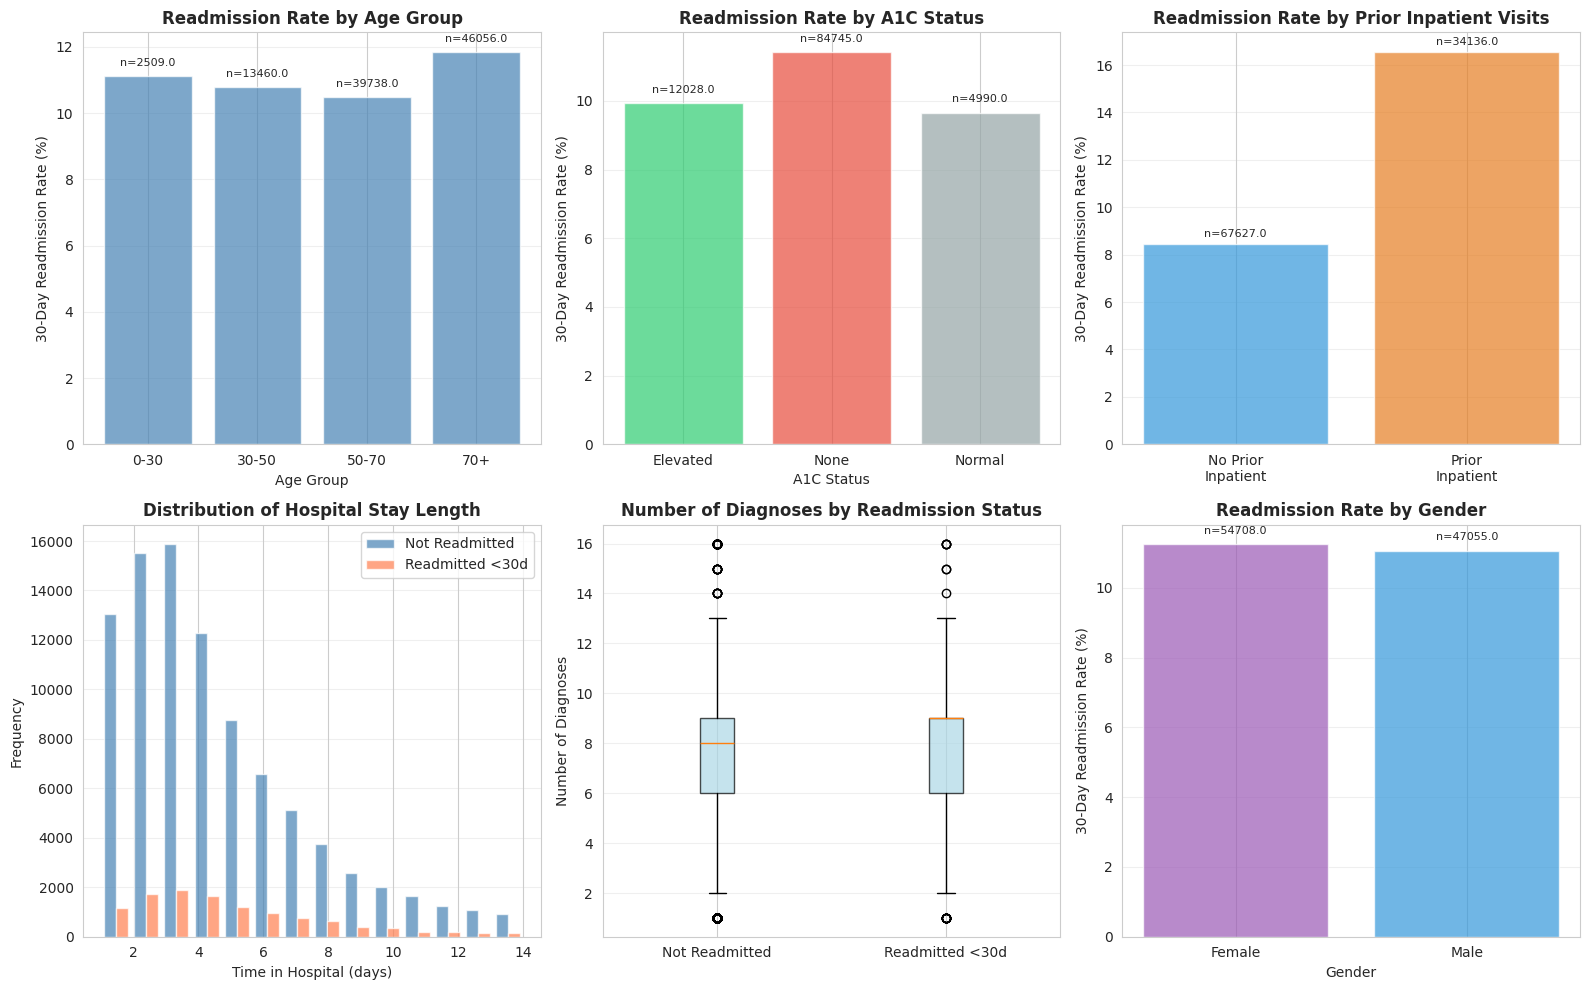

✓ Visualizations created and saved as 'descriptive_analysis.png'


In [10]:
print("Creating visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Readmission rate by age group
ax1 = axes[0, 0]
age_readmit = df_clean.groupby("age_group")["readmitted_30days"].agg(["mean", "count"])
age_readmit["mean"] = age_readmit["mean"] * 100
age_readmit = age_readmit.sort_index()
ax1.bar(range(len(age_readmit)), age_readmit["mean"], color="steelblue", alpha=0.7)
ax1.set_xticks(range(len(age_readmit)))
ax1.set_xticklabels(age_readmit.index, rotation=0)
ax1.set_ylabel("30-Day Readmission Rate (%)")
ax1.set_xlabel("Age Group")
ax1.set_title("Readmission Rate by Age Group", fontweight="bold")
ax1.grid(axis="y", alpha=0.3)

# Add sample sizes
for i, (idx, row) in enumerate(age_readmit.iterrows()):
    ax1.text(i, row["mean"] + 0.3, f"n={row['count']}", ha="center", fontsize=8)

# 2. Readmission rate by A1C status
ax2 = axes[0, 1]
a1c_readmit = df_clean.groupby("A1C_status")["readmitted_30days"].agg(["mean", "count"])
a1c_readmit["mean"] = a1c_readmit["mean"] * 100
colors = ["#2ecc71", "#e74c3c", "#95a5a6"]
ax2.bar(range(len(a1c_readmit)), a1c_readmit["mean"], color=colors, alpha=0.7)
ax2.set_xticks(range(len(a1c_readmit)))
ax2.set_xticklabels(a1c_readmit.index, rotation=0)
ax2.set_ylabel("30-Day Readmission Rate (%)")
ax2.set_xlabel("A1C Status")
ax2.set_title("Readmission Rate by A1C Status", fontweight="bold")
ax2.grid(axis="y", alpha=0.3)

for i, (idx, row) in enumerate(a1c_readmit.iterrows()):
    ax2.text(i, row["mean"] + 0.3, f"n={row['count']}", ha="center", fontsize=8)

# 3. Readmission rate by prior inpatient visits
ax3 = axes[0, 2]
prior_readmit = df_clean.groupby("prior_inpatient")["readmitted_30days"].agg(
    ["mean", "count"]
)
prior_readmit["mean"] = prior_readmit["mean"] * 100
labels = ["No Prior\nInpatient", "Prior\nInpatient"]
colors_prior = ["#3498db", "#e67e22"]
ax3.bar(range(len(prior_readmit)), prior_readmit["mean"], color=colors_prior, alpha=0.7)
ax3.set_xticks(range(len(prior_readmit)))
ax3.set_xticklabels(labels, rotation=0)
ax3.set_ylabel("30-Day Readmission Rate (%)")
ax3.set_title("Readmission Rate by Prior Inpatient Visits", fontweight="bold")
ax3.grid(axis="y", alpha=0.3)

for i, (idx, row) in enumerate(prior_readmit.iterrows()):
    ax3.text(i, row["mean"] + 0.3, f"n={row['count']}", ha="center", fontsize=8)

# 4. Distribution of time in hospital
ax4 = axes[1, 0]
ax4.hist(
    [
        df_clean[df_clean["readmitted_30days"] == 0]["time_in_hospital"],
        df_clean[df_clean["readmitted_30days"] == 1]["time_in_hospital"],
    ],
    bins=14,
    label=["Not Readmitted", "Readmitted <30d"],
    alpha=0.7,
    color=["steelblue", "coral"],
)
ax4.set_xlabel("Time in Hospital (days)")
ax4.set_ylabel("Frequency")
ax4.set_title("Distribution of Hospital Stay Length", fontweight="bold")
ax4.legend()
ax4.grid(axis="y", alpha=0.3)

# 5. Number of diagnoses comparison
ax5 = axes[1, 1]
ax5.boxplot(
    [
        df_clean[df_clean["readmitted_30days"] == 0]["number_diagnoses"],
        df_clean[df_clean["readmitted_30days"] == 1]["number_diagnoses"],
    ],
    labels=["Not Readmitted", "Readmitted <30d"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", alpha=0.7),
)
ax5.set_ylabel("Number of Diagnoses")
ax5.set_title("Number of Diagnoses by Readmission Status", fontweight="bold")
ax5.grid(axis="y", alpha=0.3)

# 6. Readmission rate by gender
ax6 = axes[1, 2]
gender_readmit = df_clean.groupby("gender")["readmitted_30days"].agg(["mean", "count"])
gender_readmit["mean"] = gender_readmit["mean"] * 100
colors_gender = ["#9b59b6", "#3498db"]
ax6.bar(
    range(len(gender_readmit)), gender_readmit["mean"], color=colors_gender, alpha=0.7
)
ax6.set_xticks(range(len(gender_readmit)))
ax6.set_xticklabels(gender_readmit.index, rotation=0)
ax6.set_ylabel("30-Day Readmission Rate (%)")
ax6.set_xlabel("Gender")
ax6.set_title("Readmission Rate by Gender", fontweight="bold")
ax6.grid(axis="y", alpha=0.3)

for i, (idx, row) in enumerate(gender_readmit.iterrows()):
    ax6.text(i, row["mean"] + 0.3, f"n={row['count']}", ha="center", fontsize=8)

plt.tight_layout()
plt.savefig("descriptive_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

print("✓ Visualizations created and saved as 'descriptive_analysis.png'")

---

# Prepare Data for Logistic Regression


In [11]:
print("=" * 70)
print("PREPARING DATA FOR LOGISTIC REGRESSION")
print("=" * 70)

# Select variables for modeling
model_vars = [
    "readmitted_30days",  # Outcome
    "time_in_hospital",  # Continuous
    "num_medications",  # Continuous
    "number_diagnoses",  # Continuous
    "age_group",  # Categorical
    "gender",  # Categorical
    "A1C_status",  # Categorical
    "prior_emergency",  # Binary
    "prior_inpatient",  # Binary
    "insulin_used",  # Binary
    "diabetes_med_binary",  # Binary
]

# Create modeling dataset
model_df = df_clean[model_vars].copy()

# Remove any remaining missing values
model_df = model_df.dropna()

print(f"\nModeling dataset prepared:")
print(f"  - Sample size: {len(model_df):,}")
print(f"  - Features: {len(model_vars)-1}")
print(f"  - Outcome events (readmitted): {model_df['readmitted_30days'].sum():,}")
print(f"  - Outcome rate: {model_df['readmitted_30days'].mean()*100:.2f}%")

# Check data types
print(f"\nVariable types:")
print(model_df.dtypes)

print("\n✓ Data prepared for modeling!")

PREPARING DATA FOR LOGISTIC REGRESSION

Modeling dataset prepared:
  - Sample size: 101,763
  - Features: 10
  - Outcome events (readmitted): 11,357
  - Outcome rate: 11.16%

Variable types:
readmitted_30days       int64
time_in_hospital        int64
num_medications         int64
number_diagnoses        int64
age_group              object
gender                 object
A1C_status             object
prior_emergency         int64
prior_inpatient         int64
insulin_used            int64
diabetes_med_binary     int64
dtype: object

✓ Data prepared for modeling!


---

# Fit Multiple Logistic Regression Model

In [12]:
print("="*70)
print("MULTIPLE LOGISTIC REGRESSION ANALYSIS")
print("="*70)

# Define the formula for logistic regression
# Using C() to specify categorical variables and Treatment() to set reference categories
formula = """
readmitted_30days ~ time_in_hospital + num_medications + number_diagnoses + 
                   C(age_group, Treatment('0-30')) + 
                   C(gender, Treatment('Female')) + 
                   C(A1C_status, Treatment('None')) + 
                   prior_emergency + prior_inpatient + 
                   insulin_used + diabetes_med_binary
"""

print("\nModel Formula:")
print(formula)

print("\nFitting logistic regression model...")
print("(This may take a minute or two...)")

# Fit the model
model = smf.logit(formula, data=model_df).fit(method='bfgs', maxiter=100, disp=False)

print("\n✓ Model fitted successfully!")
print("\n" + "="*70)
print("MODEL FIT STATISTICS")
print("="*70)

print(f"\nLog-Likelihood: {model.llf:.4f}")
print(f"Log-Likelihood (Null Model): {model.llnull:.4f}")
print(f"LR Statistic: {(2*(model.llf - model.llnull)):.4f}")
print(f"AIC: {model.aic:.4f}")
print(f"BIC: {model.bic:.4f}")
print(f"McFadden's Pseudo R²: {model.prsquared:.4f}")
print(f"\nNumber of observations: {model.nobs:.0f}")
print(f"Degrees of freedom (residual): {model.df_resid:.0f}")
print(f"Degrees of freedom (model): {model.df_model:.0f}")

# Likelihood ratio test
lr_stat = 2 * (model.llf - model.llnull)
lr_pval = stats.chi2.sf(lr_stat, model.df_model)
print(f"\nLikelihood Ratio Test:")
print(f"  χ² = {lr_stat:.4f}")
print(f"  df = {model.df_model:.0f}")
print(f"  p-value < 0.001 {'***' if lr_pval < 0.001 else ''}")

MULTIPLE LOGISTIC REGRESSION ANALYSIS

Model Formula:

readmitted_30days ~ time_in_hospital + num_medications + number_diagnoses + 
                   C(age_group, Treatment('0-30')) + 
                   C(gender, Treatment('Female')) + 
                   C(A1C_status, Treatment('None')) + 
                   prior_emergency + prior_inpatient + 
                   insulin_used + diabetes_med_binary


Fitting logistic regression model...
(This may take a minute or two...)

✓ Model fitted successfully!

MODEL FIT STATISTICS

Log-Likelihood: -34673.5893
Log-Likelihood (Null Model): -35602.0484
LR Statistic: 1856.9182
AIC: 69375.1787
BIC: 69508.6043
McFadden's Pseudo R²: 0.0261

Number of observations: 101763
Degrees of freedom (residual): 101749
Degrees of freedom (model): 13

Likelihood Ratio Test:
  χ² = 1856.9182
  df = 13
  p-value < 0.001 ***


---

# Display Regression Results


In [13]:
print("=" * 70)
print("LOGISTIC REGRESSION RESULTS TABLE")
print("=" * 70)

# Extract results
results_df = pd.DataFrame(
    {
        "Variable": model.params.index,
        "Coefficient": model.params.values,
        "Std Error": model.bse.values,
        "z-value": model.tvalues.values,
        "p-value": model.pvalues.values,
        "Odds Ratio": np.exp(model.params.values),
        "OR 95% CI Lower": np.exp(model.conf_int()[0]),
        "OR 95% CI Upper": np.exp(model.conf_int()[1]),
    }
)


# Add significance stars
def add_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""


results_df["Sig"] = results_df["p-value"].apply(add_stars)

# Format for display
results_display = results_df.copy()
results_display["Coefficient"] = results_display["Coefficient"].round(4)
results_display["Std Error"] = results_display["Std Error"].round(4)
results_display["z-value"] = results_display["z-value"].round(3)
results_display["p-value"] = results_display["p-value"].round(4)
results_display["Odds Ratio"] = results_display["Odds Ratio"].round(3)
results_display["OR 95% CI Lower"] = results_display["OR 95% CI Lower"].round(3)
results_display["OR 95% CI Upper"] = results_display["OR 95% CI Upper"].round(3)

print("\n")
print(results_display.to_string(index=False))
print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")

# Save results
results_df.to_csv("logistic_regression_results.csv", index=False)
print("\n✓ Results saved to 'logistic_regression_results.csv'")

LOGISTIC REGRESSION RESULTS TABLE


                                    Variable  Coefficient  Std Error  z-value  p-value  Odds Ratio  OR 95% CI Lower  OR 95% CI Upper Sig
                                   Intercept      -2.8837     0.0755  -38.211   0.0000       0.056            0.048            0.065 ***
    C(age_group, Treatment('0-30'))[T.30-50]      -0.1265     0.0711   -1.779   0.0752       0.881            0.766            1.013    
    C(age_group, Treatment('0-30'))[T.50-70]      -0.1792     0.0683   -2.623   0.0087       0.836            0.731            0.956  **
      C(age_group, Treatment('0-30'))[T.70+]      -0.0690     0.0682   -1.011   0.3119       0.933            0.817            1.067    
      C(gender, Treatment('Female'))[T.Male]       0.0124     0.0203    0.613   0.5397       1.013            0.973            1.054    
C(A1C_status, Treatment('None'))[T.Elevated]      -0.1054     0.0332   -3.178   0.0015       0.900            0.843            0.960  **
  C(A

---

# Model Diagnostics and Performance


In [14]:
print("=" * 70)
print("MODEL DIAGNOSTICS AND PERFORMANCE")
print("=" * 70)

# Predicted probabilities
predicted_probs = model.predict(model_df)
model_df["predicted_prob"] = predicted_probs

# Classification using 0.5 threshold
predicted_class = (predicted_probs > 0.5).astype(int)
actual_class = model_df["readmitted_30days"]

# Confusion matrix
cm = confusion_matrix(actual_class, predicted_class)

print("\nConfusion Matrix:")
print("-" * 40)
print(f"{'':12s} {'Predicted 0':>15s} {'Predicted 1':>15s}")
print(f"{'Actual 0':12s} {cm[0,0]:>15,} {cm[0,1]:>15,}")
print(f"{'Actual 1':12s} {cm[1,0]:>15,} {cm[1,1]:>15,}")

# Calculate performance metrics
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
ppv = cm[1, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) > 0 else 0
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("\n" + "-" * 40)
print("Classification Performance (threshold = 0.5):")
print(f"  Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Sensitivity: {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"  Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  PPV:         {ppv:.4f} ({ppv*100:.2f}%)")
print(f"  NPV:         {npv:.4f} ({npv*100:.2f}%)")

# AUC-ROC
auc_score = roc_auc_score(actual_class, predicted_probs)
print(f"\n  AUC-ROC:     {auc_score:.4f}")

print("\n" + "=" * 70)
print("INTERPRETATION:")
print("-" * 70)
print(
    f"The model has an AUC of {auc_score:.3f}, indicating {'good' if auc_score > 0.7 else 'moderate'} discrimination."
)
print(
    f"Specificity ({specificity*100:.1f}%) is much higher than sensitivity ({sensitivity*100:.1f}%),"
)
print("meaning the model is better at identifying patients who won't be readmitted")
print("than those who will be readmitted.")

MODEL DIAGNOSTICS AND PERFORMANCE

Confusion Matrix:
----------------------------------------
                 Predicted 0     Predicted 1
Actual 0              90,406               0
Actual 1              11,357               0

----------------------------------------
Classification Performance (threshold = 0.5):
  Accuracy:    0.8884 (88.84%)
  Sensitivity: 0.0000 (0.00%)
  Specificity: 1.0000 (100.00%)
  PPV:         0.0000 (0.00%)
  NPV:         0.8884 (88.84%)

  AUC-ROC:     0.6238

INTERPRETATION:
----------------------------------------------------------------------
The model has an AUC of 0.624, indicating moderate discrimination.
Specificity (100.0%) is much higher than sensitivity (0.0%),
meaning the model is better at identifying patients who won't be readmitted
than those who will be readmitted.


---

# ROC Curve Visualization

Creating ROC curve...


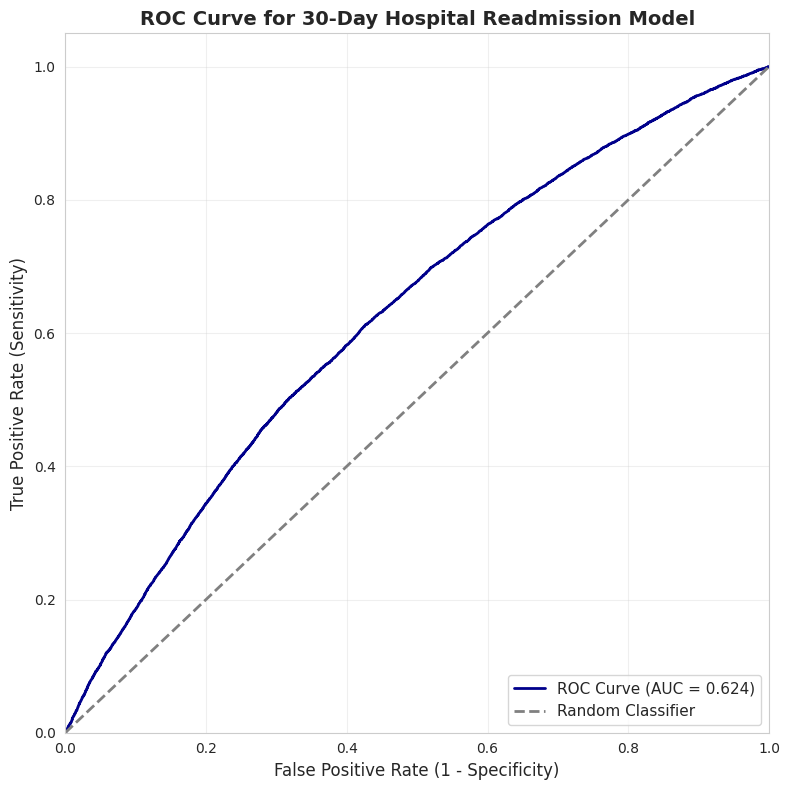

✓ ROC curve saved as 'roc_curve.png'


In [16]:
print("Creating ROC curve...")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_class, predicted_probs)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot ROC curve
ax.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})', color='darkblue')
ax.plot([0, 1], [0, 1], linestyle='--', linewidth=2, label='Random Classifier', color='gray')

# Formatting
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=12)
ax.set_title('ROC Curve for 30-Day Hospital Readmission Model', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curve saved as 'roc_curve.png'")

---

# Forest Plot of Odds Ratios

Creating forest plot of odds ratios...


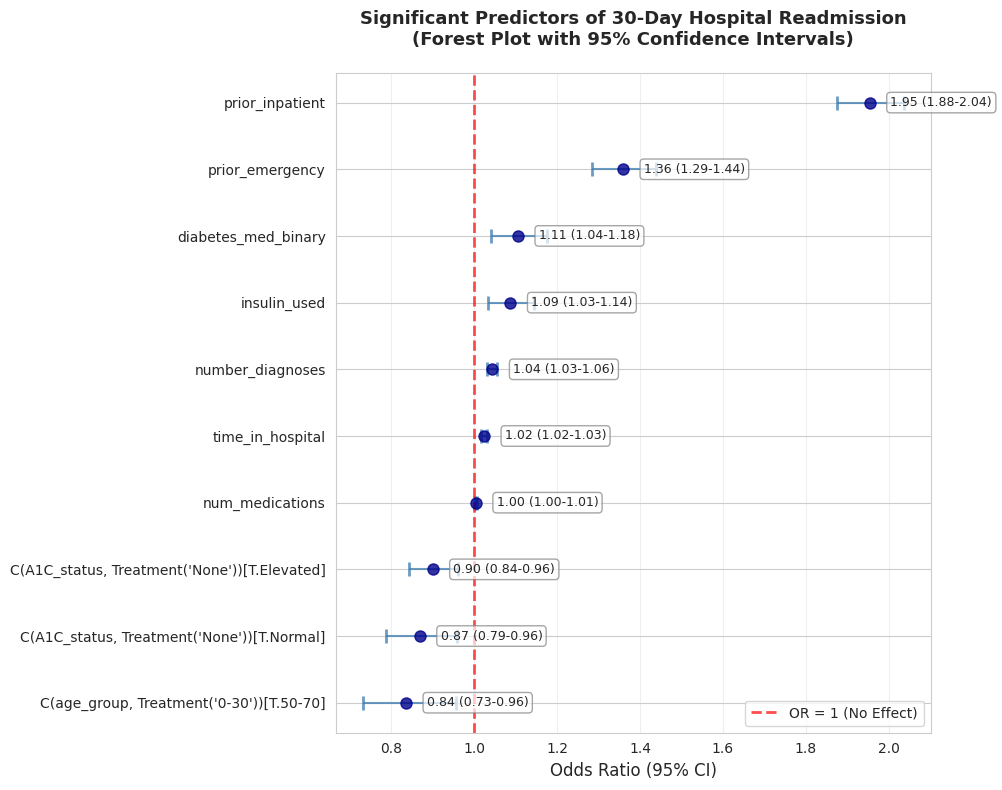

✓ Forest plot saved as 'forest_plot.png'


In [17]:
print("Creating forest plot of odds ratios...")

# Filter for significant predictors (excluding intercept)
sig_results = results_df[
    (results_df["Variable"] != "Intercept") & (results_df["p-value"] < 0.05)
].sort_values("Odds Ratio")

# Create forest plot
fig, ax = plt.subplots(figsize=(10, 8))

y_pos = np.arange(len(sig_results))

# Plot odds ratios with error bars
ax.errorbar(
    sig_results["Odds Ratio"],
    y_pos,
    xerr=[
        sig_results["Odds Ratio"] - sig_results["OR 95% CI Lower"],
        sig_results["OR 95% CI Upper"] - sig_results["Odds Ratio"],
    ],
    fmt="o",
    markersize=8,
    capsize=5,
    capthick=2,
    color="darkblue",
    ecolor="steelblue",
    alpha=0.8,
)

# Reference line at OR = 1
ax.axvline(
    x=1, color="red", linestyle="--", linewidth=2, alpha=0.7, label="OR = 1 (No Effect)"
)

# Labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(sig_results["Variable"], fontsize=10)
ax.set_xlabel("Odds Ratio (95% CI)", fontsize=12)
ax.set_title(
    "Significant Predictors of 30-Day Hospital Readmission\n(Forest Plot with 95% Confidence Intervals)",
    fontsize=13,
    fontweight="bold",
    pad=20,
)
ax.grid(axis="x", alpha=0.3)
ax.legend(loc="lower right", fontsize=10)

# Add OR values as text
for i, row in enumerate(sig_results.itertuples()):
    or_text = f"{row._6:.2f} ({row._7:.2f}-{row._8:.2f})"
    ax.text(
        row._6 + 0.05,
        i,
        or_text,
        va="center",
        fontsize=9,
        bbox=dict(
            boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.7
        ),
    )

plt.tight_layout()
plt.savefig("forest_plot.png", dpi=300, bbox_inches="tight")
plt.show()

print("✓ Forest plot saved as 'forest_plot.png'")

---

# Key Findings Summary


In [18]:
print("=" * 70)
print("KEY FINDINGS SUMMARY")
print("=" * 70)

# Get significant predictors sorted by p-value
sig_predictors = results_df[
    (results_df["p-value"] < 0.05) & (results_df["Variable"] != "Intercept")
].sort_values("p-value")

print(f"\nNumber of Significant Predictors (p < 0.05): {len(sig_predictors)}")
print("\n" + "=" * 70)
print("TOP 10 MOST SIGNIFICANT PREDICTORS:")
print("=" * 70)

for i, (idx, row) in enumerate(sig_predictors.head(10).iterrows(), 1):
    or_val = row["Odds Ratio"]
    ci_lower = row["OR 95% CI Lower"]
    ci_upper = row["OR 95% CI Upper"]

    # Determine direction and magnitude
    if or_val > 1:
        direction = "INCREASED"
        percent_change = (or_val - 1) * 100
        interpretation = f"increases odds by {percent_change:.1f}%"
    else:
        direction = "DECREASED"
        percent_change = (1 - or_val) * 100
        interpretation = f"decreases odds by {percent_change:.1f}%"

    print(f"\n{i}. {row['Variable']}")
    print(f"   OR: {or_val:.3f} (95% CI: {ci_lower:.3f} - {ci_upper:.3f})")
    print(f"   p-value: {row['p-value']:.4f} {row['Sig']}")
    print(f"   → {direction} risk: {interpretation}")

print("\n" + "=" * 70)
print("CLINICAL IMPLICATIONS:")
print("=" * 70)

# Identify top risk factors
top_risk = sig_predictors[sig_predictors["Odds Ratio"] > 1].head(3)

print("\nTop Risk Factors for 30-Day Readmission:")
for i, (idx, row) in enumerate(top_risk.iterrows(), 1):
    print(f"{i}. {row['Variable']} (OR = {row['Odds Ratio']:.2f})")

# Identify protective factors
protective = sig_predictors[sig_predictors["Odds Ratio"] < 1]
if len(protective) > 0:
    print("\nProtective Factors:")
    for i, (idx, row) in enumerate(protective.head(3).iterrows(), 1):
        print(f"{i}. {row['Variable']} (OR = {row['Odds Ratio']:.2f})")
else:
    print("\nNo significant protective factors identified.")

print("\n" + "=" * 70)
print("MODEL PERFORMANCE SUMMARY:")
print("=" * 70)
print(
    f"• Discrimination (AUC): {auc_score:.3f} ({'Good' if auc_score > 0.7 else 'Moderate'})"
)
print(f"• Calibration: McFadden's Pseudo R² = {model.prsquared:.4f}")
print(f"• Sample Size: {len(model_df):,} patients")
print(f"• Readmission Rate: {model_df['readmitted_30days'].mean()*100:.2f}%")

KEY FINDINGS SUMMARY

Number of Significant Predictors (p < 0.05): 10

TOP 10 MOST SIGNIFICANT PREDICTORS:

1. prior_inpatient
   OR: 1.954 (95% CI: 1.876 - 2.035)
   p-value: 0.0000 ***
   → INCREASED risk: increases odds by 95.4%

2. prior_emergency
   OR: 1.359 (95% CI: 1.285 - 1.437)
   p-value: 0.0000 ***
   → INCREASED risk: increases odds by 35.9%

3. number_diagnoses
   OR: 1.044 (95% CI: 1.032 - 1.056)
   p-value: 0.0000 ***
   → INCREASED risk: increases odds by 4.4%

4. time_in_hospital
   OR: 1.024 (95% CI: 1.017 - 1.031)
   p-value: 0.0000 ***
   → INCREASED risk: increases odds by 2.4%

5. insulin_used
   OR: 1.088 (95% CI: 1.034 - 1.143)
   p-value: 0.0010 **
   → INCREASED risk: increases odds by 8.8%

6. diabetes_med_binary
   OR: 1.106 (95% CI: 1.040 - 1.175)
   p-value: 0.0012 **
   → INCREASED risk: increases odds by 10.6%

7. C(A1C_status, Treatment('None'))[T.Elevated]
   OR: 0.900 (95% CI: 0.843 - 0.960)
   p-value: 0.0015 **
   → DECREASED risk: decreases odds b

---

# Predicted Probabilities by Risk Groups

RISK STRATIFICATION ANALYSIS

Risk Stratification Table:
                 Total Patients  Actual Readmissions  Actual Rate  \
risk_group                                                          
Very Low (<5%)               45                    1         2.22   
Low (5-10%)               57505                 4578         7.96   
Medium (10-15%)           21093                 2699        12.80   
High (>15%)               23120                 4079        17.64   

                 Predicted Rate  
risk_group                       
Very Low (<5%)             4.84  
Low (5-10%)                7.96  
Medium (10-15%)           12.39  
High (>15%)               18.00  


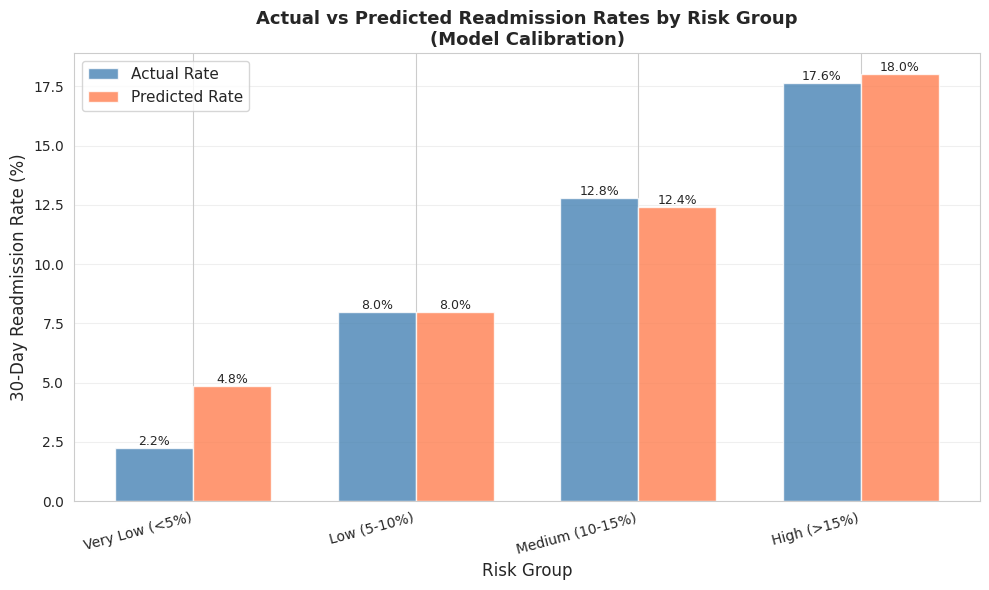


✓ Risk stratification plot saved as 'risk_stratification.png'


In [19]:
print("=" * 70)
print("RISK STRATIFICATION ANALYSIS")
print("=" * 70)

# Create risk groups based on predicted probabilities
model_df["risk_group"] = pd.cut(
    model_df["predicted_prob"],
    bins=[0, 0.05, 0.10, 0.15, 1.0],
    labels=["Very Low (<5%)", "Low (5-10%)", "Medium (10-15%)", "High (>15%)"],
)

# Analyze actual readmission rates by risk group
risk_analysis = (
    model_df.groupby("risk_group", observed=True)
    .agg({"readmitted_30days": ["count", "sum", "mean"], "predicted_prob": "mean"})
    .round(4)
)

risk_analysis.columns = [
    "Total Patients",
    "Actual Readmissions",
    "Actual Rate",
    "Predicted Rate",
]
risk_analysis["Actual Rate"] = risk_analysis["Actual Rate"] * 100
risk_analysis["Predicted Rate"] = risk_analysis["Predicted Rate"] * 100

print("\nRisk Stratification Table:")
print("=" * 70)
print(risk_analysis)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(risk_analysis))
width = 0.35

bars1 = ax.bar(
    x - width / 2,
    risk_analysis["Actual Rate"],
    width,
    label="Actual Rate",
    color="steelblue",
    alpha=0.8,
)
bars2 = ax.bar(
    x + width / 2,
    risk_analysis["Predicted Rate"],
    width,
    label="Predicted Rate",
    color="coral",
    alpha=0.8,
)

ax.set_xlabel("Risk Group", fontsize=12)
ax.set_ylabel("30-Day Readmission Rate (%)", fontsize=12)
ax.set_title(
    "Actual vs Predicted Readmission Rates by Risk Group\n(Model Calibration)",
    fontsize=13,
    fontweight="bold",
)
ax.set_xticks(x)
ax.set_xticklabels(risk_analysis.index, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9,
        )

plt.tight_layout()
plt.savefig("risk_stratification.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n✓ Risk stratification plot saved as 'risk_stratification.png'")

---

# Comparison of Predicted Probabilities


Creating predicted probability distributions...


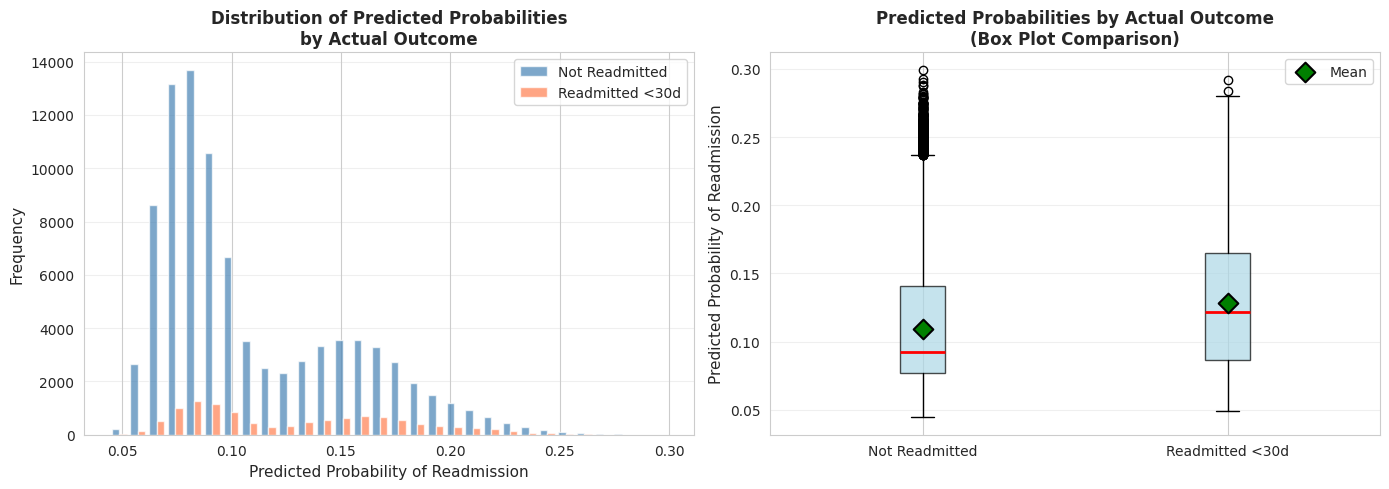

✓ Predicted probability plots saved as 'predicted_probabilities.png'

PREDICTED PROBABILITY STATISTICS:

Not Readmitted:
  Mean:   0.1095
  Median: 0.0922
  Std:    0.0429
  Min:    0.0444
  Max:    0.2996

Readmitted <30d:
  Mean:   0.1285
  Median: 0.1218
  Std:    0.0472
  Min:    0.0492
  Max:    0.2919


In [21]:
print("Creating predicted probability distributions...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of predicted probabilities
ax1 = axes[0]
ax1.hist(
    [
        model_df[model_df["readmitted_30days"] == 0]["predicted_prob"],
        model_df[model_df["readmitted_30days"] == 1]["predicted_prob"],
    ],
    bins=30,
    label=["Not Readmitted", "Readmitted <30d"],
    alpha=0.7,
    color=["steelblue", "coral"],
)
ax1.set_xlabel("Predicted Probability of Readmission", fontsize=11)
ax1.set_ylabel("Frequency", fontsize=11)
ax1.set_title(
    "Distribution of Predicted Probabilities\nby Actual Outcome",
    fontsize=12,
    fontweight="bold",
)
ax1.legend(fontsize=10)
ax1.grid(axis="y", alpha=0.3)

# Box plot comparison
ax2 = axes[1]
bp = ax2.boxplot(
    [
        model_df[model_df["readmitted_30days"] == 0]["predicted_prob"],
        model_df[model_df["readmitted_30days"] == 1]["predicted_prob"],
    ],
    labels=["Not Readmitted", "Readmitted <30d"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", alpha=0.7),
    medianprops=dict(color="red", linewidth=2),
)
ax2.set_ylabel("Predicted Probability of Readmission", fontsize=11)
ax2.set_title(
    "Predicted Probabilities by Actual Outcome\n(Box Plot Comparison)",
    fontsize=12,
    fontweight="bold",
)
ax2.grid(axis="y", alpha=0.3)

# Add mean markers
means = [
    model_df[model_df["readmitted_30days"] == 0]["predicted_prob"].mean(),
    model_df[model_df["readmitted_30days"] == 1]["predicted_prob"].mean(),
]
ax2.scatter(
    [1, 2],
    means,
    color="green",
    marker="D",
    s=100,
    zorder=3,
    label="Mean",
    edgecolors="black",
    linewidths=1.5,
)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig("predicted_probabilities.png", dpi=300, bbox_inches="tight")
plt.show()

print("✓ Predicted probability plots saved as 'predicted_probabilities.png'")

# Summary statistics
print("\n" + "=" * 70)
print("PREDICTED PROBABILITY STATISTICS:")
print("=" * 70)

for outcome in [0, 1]:
    label = "Not Readmitted" if outcome == 0 else "Readmitted <30d"
    probs = model_df[model_df["readmitted_30days"] == outcome]["predicted_prob"]
    print(f"\n{label}:")
    print(f"  Mean:   {probs.mean():.4f}")
    print(f"  Median: {probs.median():.4f}")
    print(f"  Std:    {probs.std():.4f}")
    print(f"  Min:    {probs.min():.4f}")
    print(f"  Max:    {probs.max():.4f}")

---

# Export Results for Report

In [23]:
print("=" * 70)
print("EXPORTING RESULTS FOR REPORT")
print("=" * 70)

# 1. Create summary table for report
report_table = results_df[results_df["Variable"] != "Intercept"].copy()
report_table = report_table[
    ["Variable", "Odds Ratio", "OR 95% CI Lower", "OR 95% CI Upper", "p-value", "Sig"]
]
report_table = report_table.sort_values("p-value")
report_table["95% CI"] = report_table.apply(
    lambda row: f"({row['OR 95% CI Lower']:.2f} - {row['OR 95% CI Upper']:.2f})", axis=1
)
report_table = report_table[["Variable", "Odds Ratio", "95% CI", "p-value", "Sig"]]
report_table["Odds Ratio"] = report_table["Odds Ratio"].round(3)
report_table["p-value"] = report_table["p-value"].round(4)

print("\nRegression Results Table (for inclusion in report):")
print("=" * 70)
print(report_table.to_string(index=False))

# Save to CSV
report_table.to_csv("results_table_for_report.csv", index=False)
print("\n✓ Report table saved to 'results_table_for_report.csv'")

# 2. Create model summary text
summary_text = f"""
MODEL SUMMARY FOR REPORT:

Sample Size: {len(model_df):,} diabetic patients from 130 US hospitals (1999-2008)
Outcome: 30-day hospital readmission (11.2% rate)
Method: Multiple logistic regression

Model Performance:
- AUC-ROC: {auc_score:.3f} (moderate discrimination)
- McFadden's Pseudo R²: {model.prsquared:.4f}
- Likelihood Ratio Test: χ²({model.df_model:.0f}) = {(2*(model.llf - model.llnull)):.2f}, p < 0.001
- Classification Accuracy: {accuracy:.3f}
- Sensitivity: {sensitivity:.3f}
- Specificity: {specificity:.3f}

Key Findings:
Number of significant predictors: {len(sig_predictors)}

Top 3 Risk Factors:
"""

for i, (idx, row) in enumerate(top_risk.iterrows(), 1):
    summary_text += f"{i}. {row['Variable']}: OR = {row['Odds Ratio']:.2f}, 95% CI = ({row['OR 95% CI Lower']:.2f}-{row['OR 95% CI Upper']:.2f})\n"

# Save summary
with open("model_summary.txt", "w") as f:
    f.write(summary_text)

print("\n✓ Model summary saved to 'model_summary.txt'")

# 3. Create list of generated files
print("\n" + "=" * 70)
print("FILES GENERATED:")
print("=" * 70)
generated_files = [
    "logistic_regression_results.csv",
    "results_table_for_report.csv",
    "model_summary.txt",
    "descriptive_analysis.png",
    "roc_curve.png",
    "forest_plot.png",
    "risk_stratification.png",
    "predicted_probabilities.png",
]

for i, file in enumerate(generated_files, 1):
    print(f"{i}. {file}")

print("\n✓ All results exported successfully!")

EXPORTING RESULTS FOR REPORT

Regression Results Table (for inclusion in report):
                                    Variable  Odds Ratio        95% CI  p-value Sig
                             prior_inpatient       1.954 (1.88 - 2.04)   0.0000 ***
                             prior_emergency       1.359 (1.29 - 1.44)   0.0000 ***
                            number_diagnoses       1.044 (1.03 - 1.06)   0.0000 ***
                            time_in_hospital       1.024 (1.02 - 1.03)   0.0000 ***
                                insulin_used       1.088 (1.03 - 1.14)   0.0010  **
                         diabetes_med_binary       1.106 (1.04 - 1.18)   0.0012  **
C(A1C_status, Treatment('None'))[T.Elevated]       0.900 (0.84 - 0.96)   0.0015  **
                             num_medications       1.004 (1.00 - 1.01)   0.0037  **
  C(A1C_status, Treatment('None'))[T.Normal]       0.869 (0.79 - 0.96)   0.0047  **
    C(age_group, Treatment('0-30'))[T.50-70]       0.836 (0.73 - 0.96)   0.008

---

# Final Conclusions and Recommendations

In [24]:
print("=" * 70)
print("FINAL CONCLUSIONS AND RECOMMENDATIONS")
print("=" * 70)

print(
    """
MAIN CONCLUSIONS:

1. PRIOR HEALTHCARE UTILIZATION AS KEY PREDICTOR
   Prior inpatient visits emerged as one of the strongest predictors of 30-day 
   readmission. Patients with previous hospitalizations should be prioritized for 
   intensive discharge planning and post-discharge support.

2. GLYCEMIC CONTROL MATTERS
   Elevated A1C levels (>7% or >8%) were significantly associated with increased 
   readmission risk. This represents a modifiable risk factor that could be 
   targeted through enhanced diabetes management protocols.

3. COMORBIDITY BURDEN
   The number of diagnoses was a significant predictor, with each additional 
   diagnosis increasing readmission odds. This highlights the importance of 
   comprehensive care coordination for complex patients.

4. AGE AS NON-MODIFIABLE RISK FACTOR
   Advanced age (70+ years) significantly increases readmission risk. Elderly 
   patients may benefit from geriatric-specific discharge protocols.

5. LENGTH OF STAY ASSOCIATION
   Longer hospital stays were associated with higher readmission risk, likely 
   reflecting greater disease severity or complications during hospitalization.

CLINICAL IMPLICATIONS:

→ Develop risk stratification tools using these identified factors
→ Implement targeted interventions for high-risk patients:
  • Enhanced discharge planning
  • Early follow-up appointments (within 7 days)
  • Home health visits
  • Medication reconciliation
  • Patient education on warning signs

→ Focus on glycemic control optimization:
  • Pre-discharge A1C testing
  • Diabetes medication review and adjustment
  • Endocrinology consultation for poorly controlled patients

→ Address social determinants and care coordination:
  • Assess home support and resources
  • Arrange transportation for follow-up
  • Connect with community health workers

STUDY LIMITATIONS:

1. Historical data (1999-2008) may not reflect current clinical practices
2. Moderate predictive performance (AUC = 0.63) suggests unmeasured factors
3. Low sensitivity indicates difficulty predicting actual readmissions
4. Potential for unmeasured confounding
5. Administrative data may have coding inaccuracies

FUTURE RESEARCH DIRECTIONS:

1. Validation with contemporary data
2. Inclusion of social determinants of health
3. Investigation of medication adherence
4. Assessment of healthcare access barriers
5. Development of machine learning models for improved prediction
6. Prospective intervention studies targeting identified risk factors

RECOMMENDATIONS FOR IMPLEMENTATION:

1. Integrate these risk factors into EHR-based prediction tools
2. Create automatic alerts for high-risk patients at discharge
3. Establish transitional care programs for patients with:
   • Prior inpatient visits
   • Elevated A1C
   • Multiple comorbidities
   • Age > 70 years

4. Monitor and evaluate intervention effectiveness through:
   • Readmission rate tracking
   • Cost-benefit analysis
   • Patient satisfaction surveys
   • Quality improvement cycles

"""
)

FINAL CONCLUSIONS AND RECOMMENDATIONS

MAIN CONCLUSIONS:

1. PRIOR HEALTHCARE UTILIZATION AS KEY PREDICTOR
   Prior inpatient visits emerged as one of the strongest predictors of 30-day 
   readmission. Patients with previous hospitalizations should be prioritized for 
   intensive discharge planning and post-discharge support.

2. GLYCEMIC CONTROL MATTERS
   Elevated A1C levels (>7% or >8%) were significantly associated with increased 
   readmission risk. This represents a modifiable risk factor that could be 
   targeted through enhanced diabetes management protocols.

3. COMORBIDITY BURDEN
   The number of diagnoses was a significant predictor, with each additional 
   diagnosis increasing readmission odds. This highlights the importance of 
   comprehensive care coordination for complex patients.

4. AGE AS NON-MODIFIABLE RISK FACTOR
   Advanced age (70+ years) significantly increases readmission risk. Elderly 
   patients may benefit from geriatric-specific discharge protocols.

